In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
names=["0","107","1684","1912","3437",'348',"3980","414","686","698"]
feat_file_names= ['facebook/'+x+".feat" for x in names]
featnames_filenames=['facebook/'+x+".featnames" for x in names]

In [3]:
for n in range(len(feat_file_names)):
    df = pd.read_csv(feat_file_names[n],header=None, sep=' ')
    if n==0:
        nodes_df = df[0]
    else: 
        nodes_df = pd.concat([nodes_df,df[0]])
nodes_df = nodes_df.drop_duplicates()

In [4]:
df_list = []
for i in range(len(feat_file_names)):
    c_df = pd.read_csv(feat_file_names[i], header=None, sep=' ')
    c = pd.read_csv(featnames_filenames[i], header=None,)[0].tolist()
    c2 = []
    for j in range(len(c)):
        c2.append(' '.join(c[j].split(' ')[1:]))
    nodes = c_df[0].tolist()
    c_df = c_df.drop(columns=[0])
    c = {v: k for v, k in enumerate(c2,1)}
    c_df = c_df.rename(columns=c)
    c_df.index = nodes
    df_list.append(c_df)

In [5]:
my_nodes={}
for node in range(1,4036):
    my_nodes.setdefault(node, [])

for x in df_list:
    for node in range(1,4036):
        for i in x.index:
            if i==node:
                my_nodes[node].append(x.loc[node,])


In [52]:
for i in range(1,len(my_nodes)+1):
    if my_nodes[i] == []:
        print(i)

686
1912
3437
3980


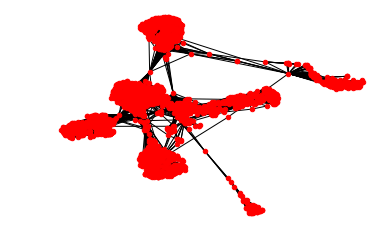

In [41]:
#Create our graph object and display
F = nx.read_edgelist('facebook_combined.txt',
                     create_using=nx.Graph(),
                     nodetype=int)

for i in range(1,len(my_nodes)+1):
    try:        
        for j in range(len(my_nodes[i][0])):
            if my_nodes[i][0].values[j]==1:
                a = ' '.join(' '.join(my_nodes[i][0].index[j].split(' ')[:-2]).split(';')[:-1])
                F.nodes[i][a] = my_nodes[i][0].index[j].split(' ')[-1]
    except:
        pass

plt.axis('off')
nx.draw_networkx(F, with_labels=False, node_size=20) 

In [49]:
F.nodes[686]

{}